In [2]:
import sys
if '../src/' not in sys.path: sys.path.append('../src/')
from data.utils import split_image_horizontally
from features.keypoints import match_by_keypoints, draw_keypoints
from visualization.utils import cv2_imshow
import cv2

# Similarity by features

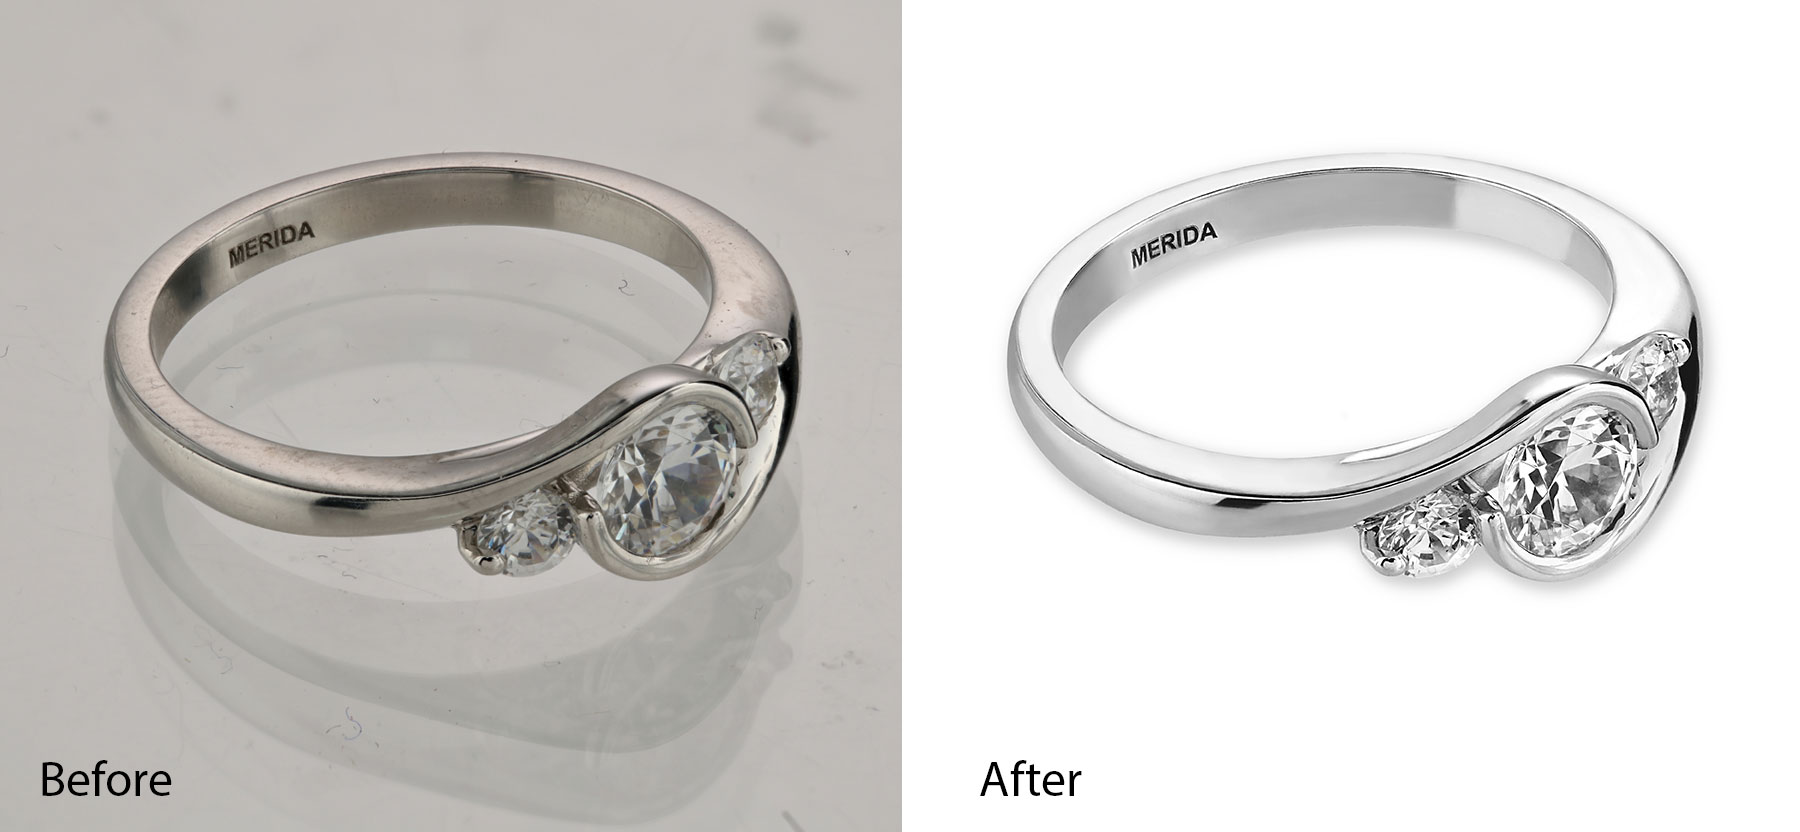

In [2]:
!wget https://tecpixel.com/wp-content/uploads/2018/10/banner001.jpg -q -O ../data/images/good_before_after.jpg
im = cv2.imread("../data/images/good_before_after.jpg")
cv2_imshow(im)

In [3]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.autograd import Variable
from PIL import Image

# define preprocessing
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

# create model chop off top layer
model = models.wide_resnet50_2(pretrained=True)
modules=list(model.children())[:-1]
model =nn.Sequential(*modules)
for p in model.parameters():
    p.requires_grad = False

ModuleNotFoundError: No module named 'torch'

In [16]:
def get_dist(b,a):
    img_tensor = preprocess(Image.fromarray(b))
    img_tensor.unsqueeze_(0)

    img_variable = Variable(img_tensor)
    f1 = model(img_variable)

    img_tensor = preprocess(Image.fromarray(a))
    img_tensor.unsqueeze_(0)

    img_variable = Variable(img_tensor)
    f2 = model(img_variable)
    return torch.dist(f1, f2)

# split image
before, after = split_image_horizontally("../data/images/good_before_after.jpg")

# comapare
get_dist(before, after)

tensor(1.3836)

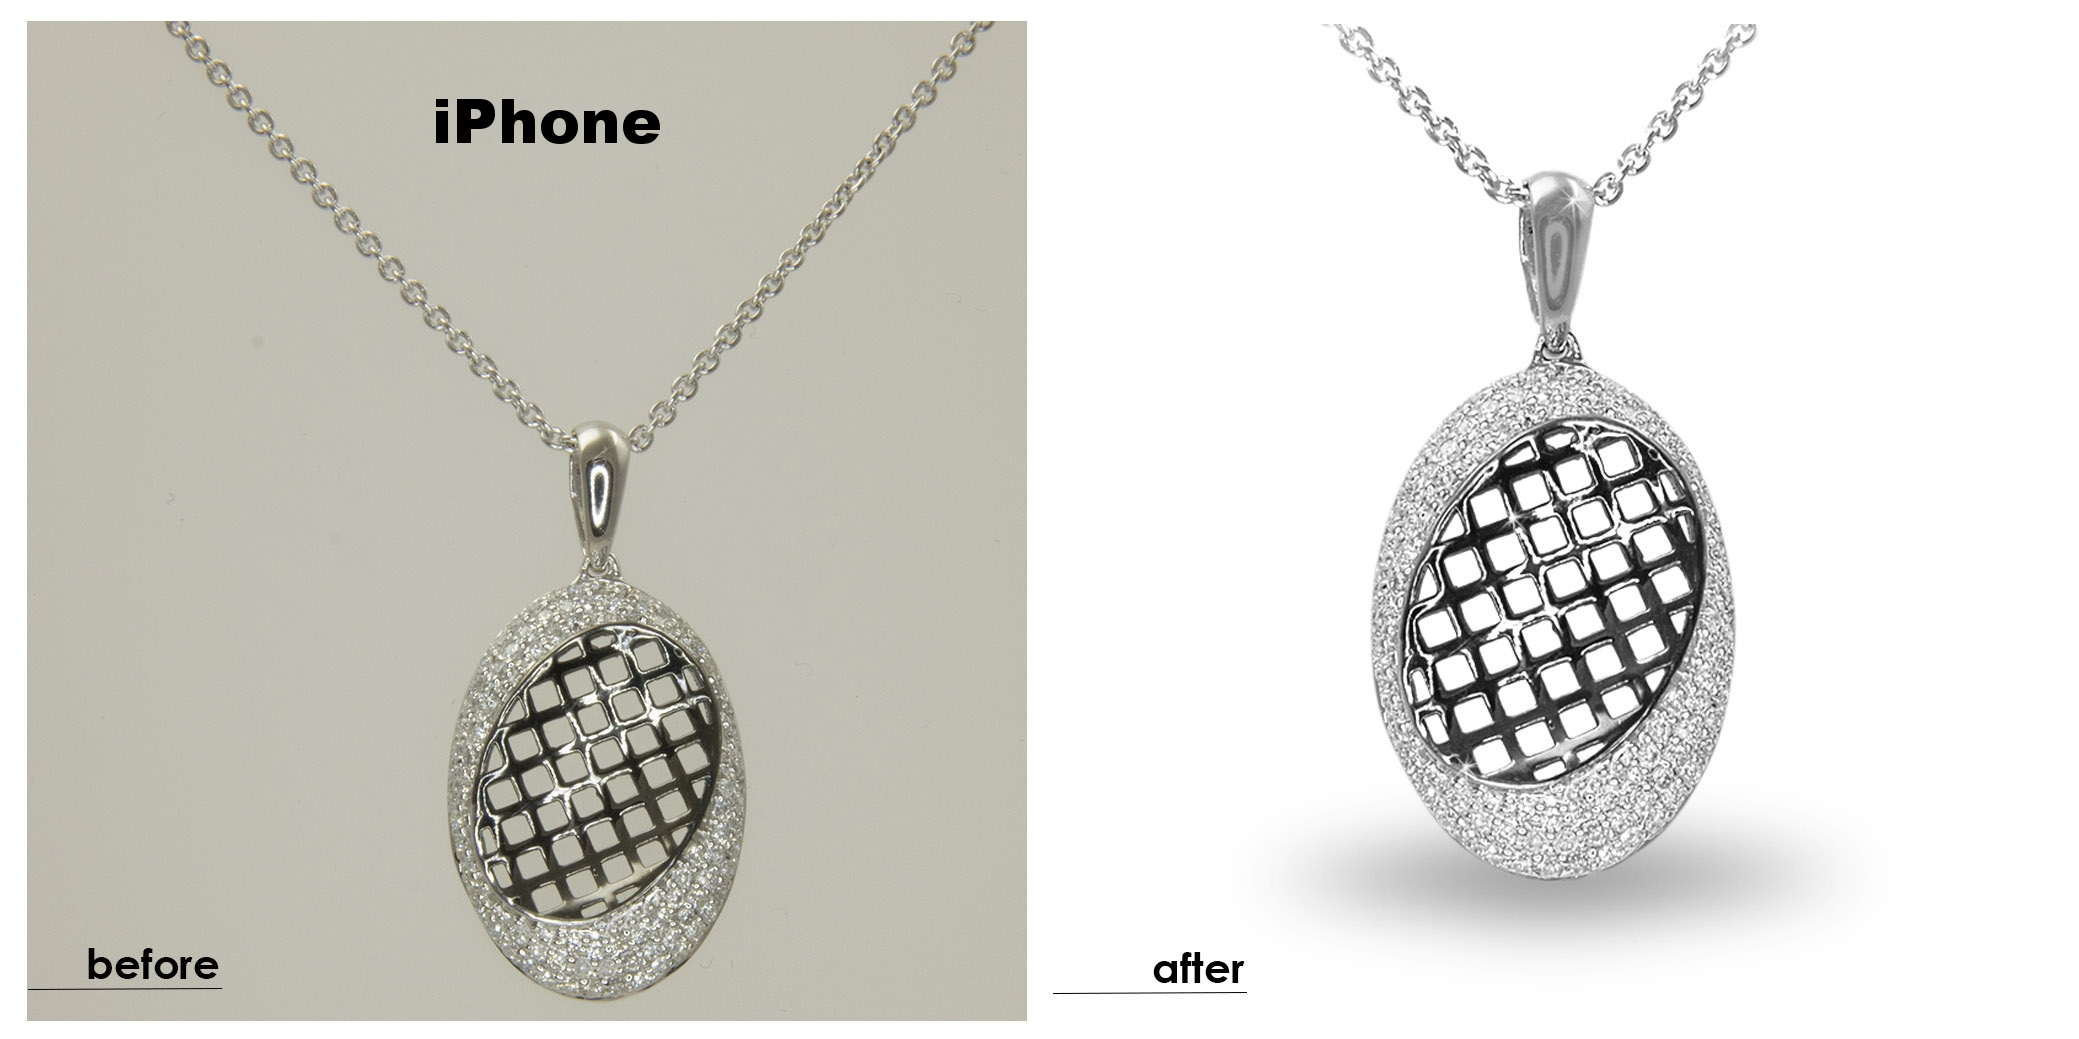

In [12]:
!wget 'https://images.squarespace-cdn.com/content/v1/54e08292e4b054179788c217/1433948421285-UOKH0P8DMGJIK1M3S07Y/ke17ZwdGBToddI8pDm48kHmLm1PKvYZD3vttx81Zkrh7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QPOohDIaIeljMHgDF5CVlOqpeNLcJ80NK65_fV7S1UcHW3I10rWuQdSKfPmto4vLCxorzK-YdriTPpy9hvBNWwW5u7Q3Ri7taaV1suP5koQ/BeforeAndAfter9.jpg?format=2500w' -q -O ../data/images/bad_before_after1.jpg
im = cv2.imread("../data/images/bad_before_after1.jpg")
cv2_imshow(im)

In [18]:
# split image
before, after = split_image_horizontally("../data/images/bad_before_after.jpg")

# comapare
get_dist(before, after)

tensor(1.6020)

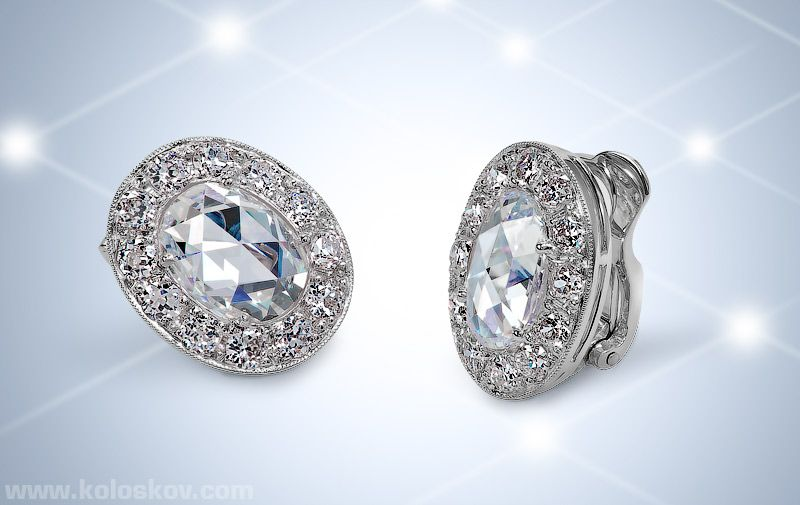

In [13]:
!wget 'https://i.pinimg.com/originals/bc/5c/af/bc5cafad72508ec377a51f6d65418818.jpg' -q -O ../data/images/bad_before_after2.jpg
im = cv2.imread("../data/images/bad_before_after2.jpg")
cv2_imshow(im)

In [20]:
# split image
before, after = split_image_horizontally("../data/images/bad_before_after.jpg")

# comapare
get_dist(before, after)

tensor(1.5329)

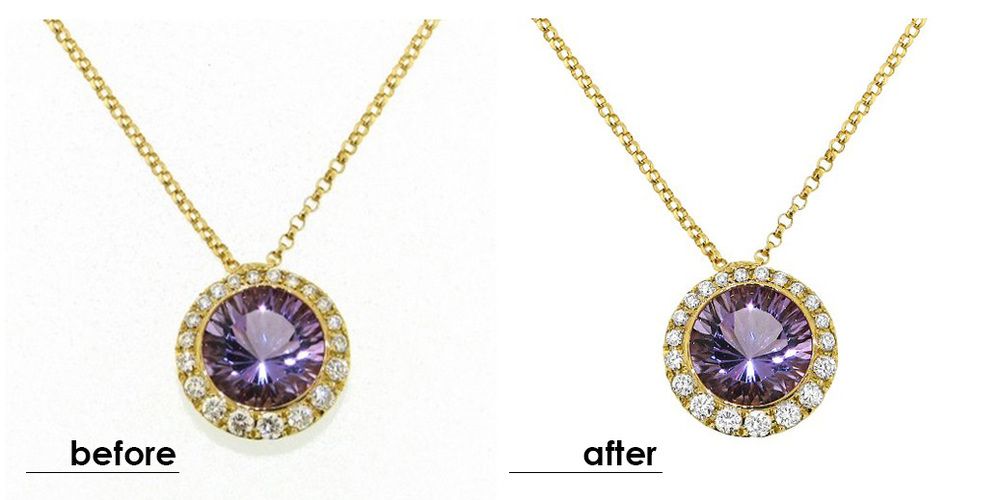

In [14]:
!wget 'https://images.squarespace-cdn.com/content/v1/54e08292e4b054179788c217/1429000509337-TC9NDSY3WUC0CR2QJL1J/ke17ZwdGBToddI8pDm48kFmoEUM07DQvTDg-WvhJ_2YUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcARUw2T0caXtqi0OX3pY09hpy8pU2b-OHL4D-wlprrpSLXSF5Q1Ow5I08cPxKyXZP/BeforeAndAfter6.jpg' -q -O ../data/images/bad_before_after3.jpg
im = cv2.imread("../data/images/bad_before_after3.jpg")
cv2_imshow(im)

In [22]:
# split image
before, after = split_image_horizontally("../data/images/bad_before_after.jpg")

# comapare
get_dist(before, after)

tensor(1.4659)

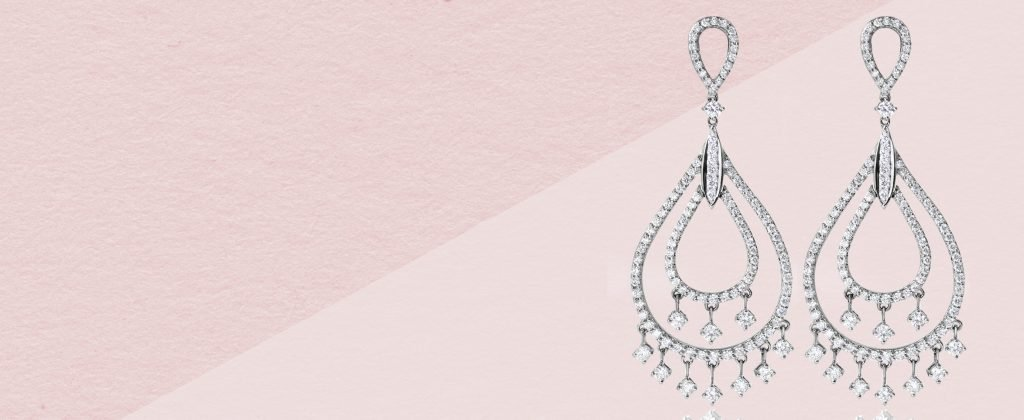

In [25]:
!wget 'https://www.paperboatcreative.com/wp-content/uploads/2019/05/Product-Photography-Manila-41-1024x420.jpg' -q -O ../data/images/bad_before_after.jpg
im = cv2.imread("../data/images/bad_before_after.jpg")
cv2_imshow(im)

In [26]:
# split image
before, after = split_image_horizontally("../data/images/bad_before_after.jpg")

# comapare
get_dist(before, after)

tensor(1.4829)

# Image Registration

Image registration is the process of transforming different images of one scene into the same coordinate system. 

In [5]:
# split image
before, after = split_image_horizontally("../data/images/good_before_after.jpg")

warped_image, img3, good_matches, matches = match_by_keypoints(before, after)

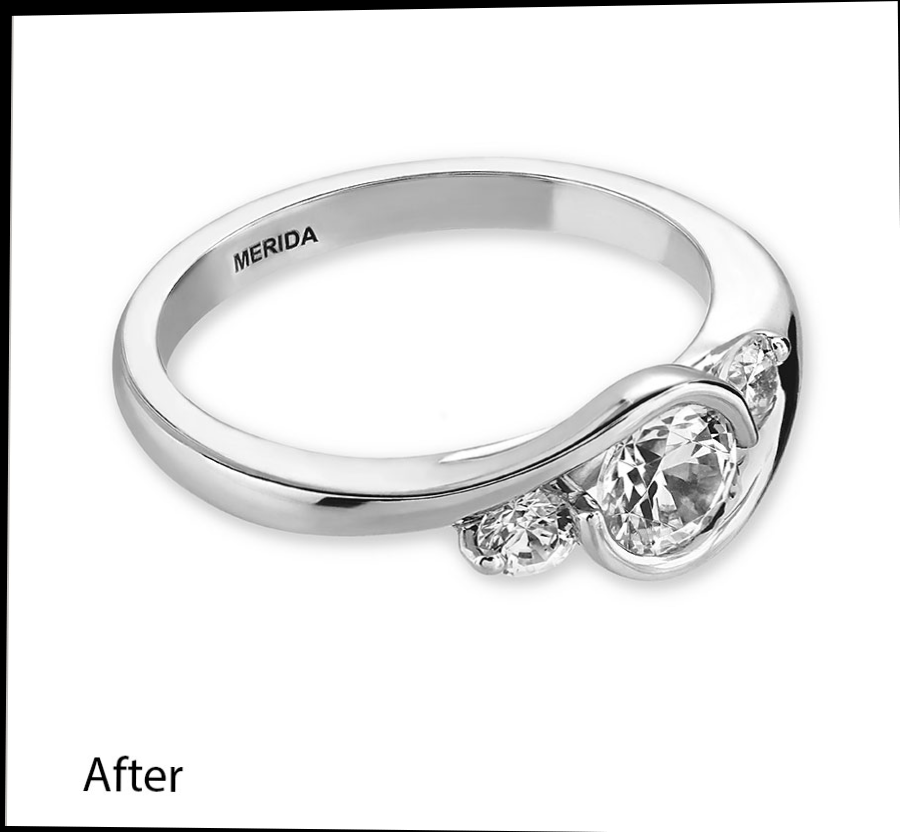

In [6]:
cv2_imshow(warped_image)

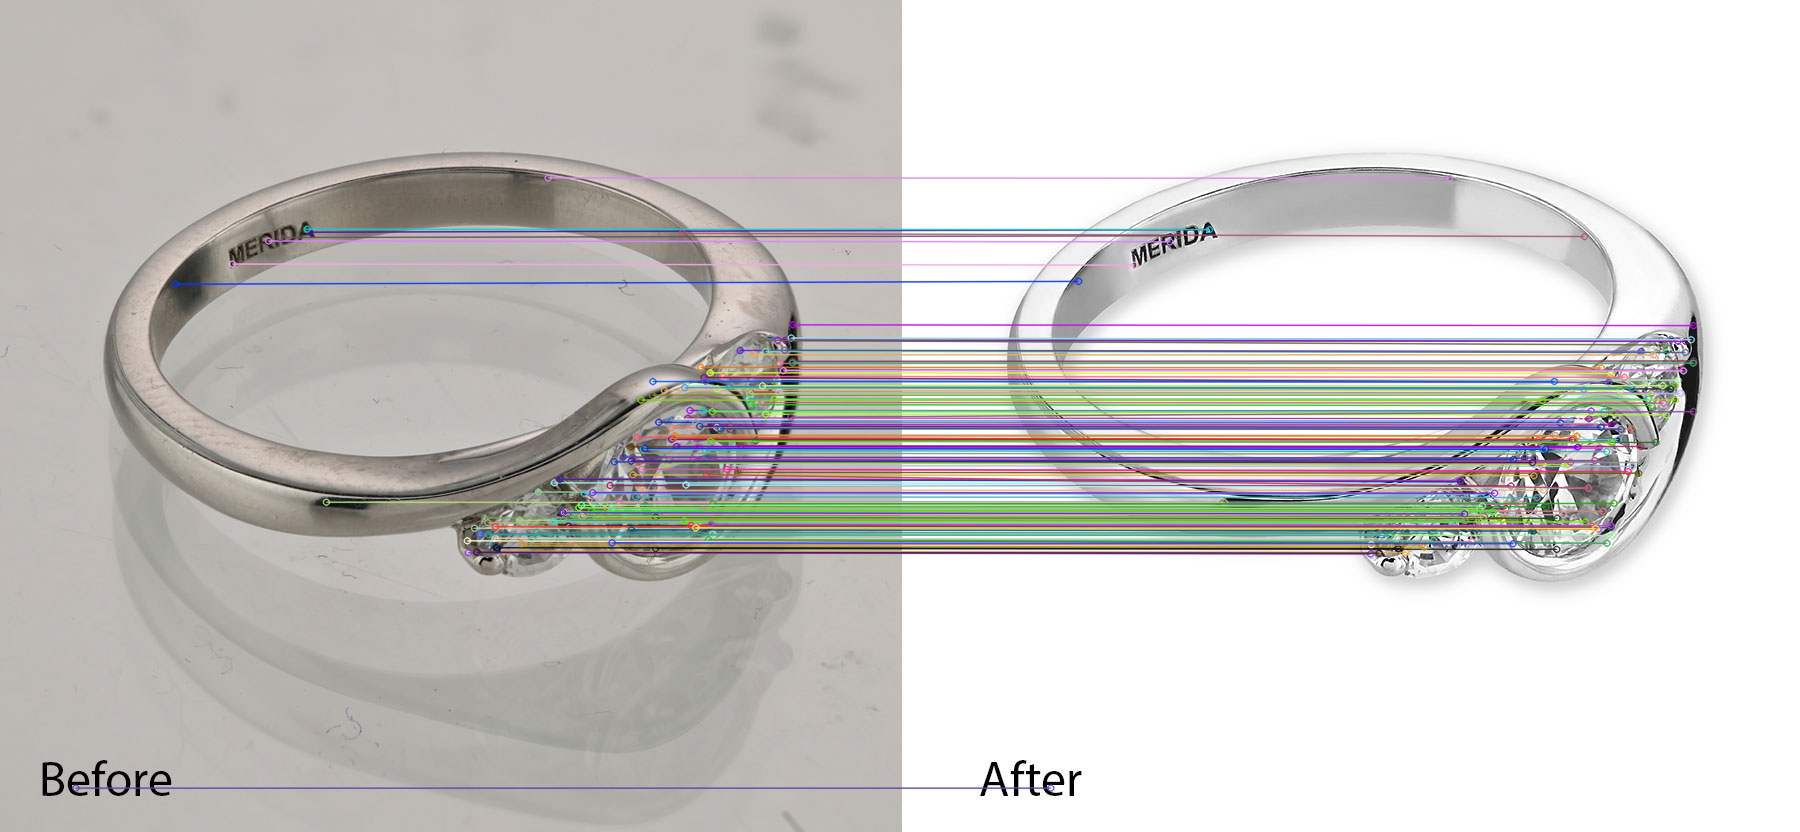

In [7]:
cv2_imshow(img3)

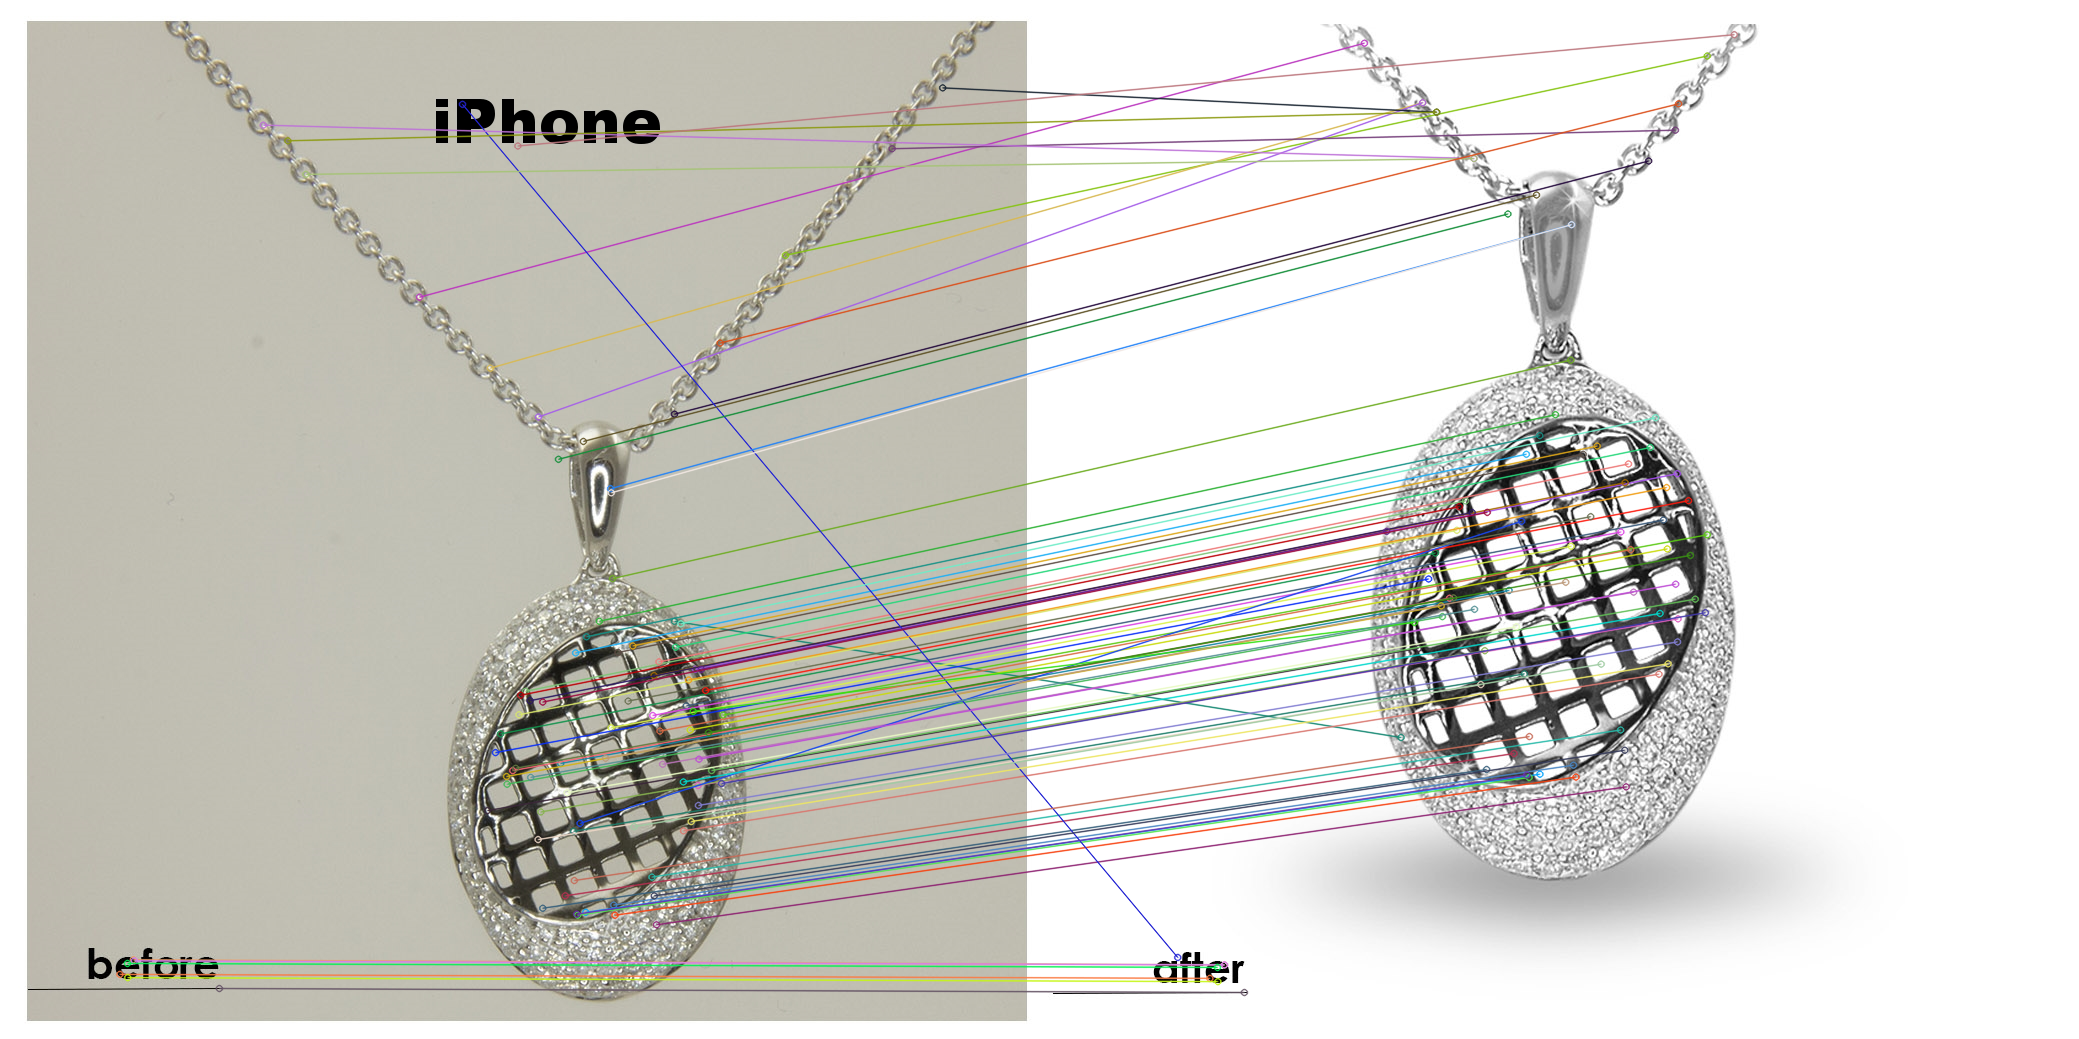

In [23]:
# split image
before, after = split_image_horizontally("../data/images/bad_before_after1.jpg")
warped_image, img3, good_matches, matches = match_by_keypoints(before, after)
cv2_imshow(img3)

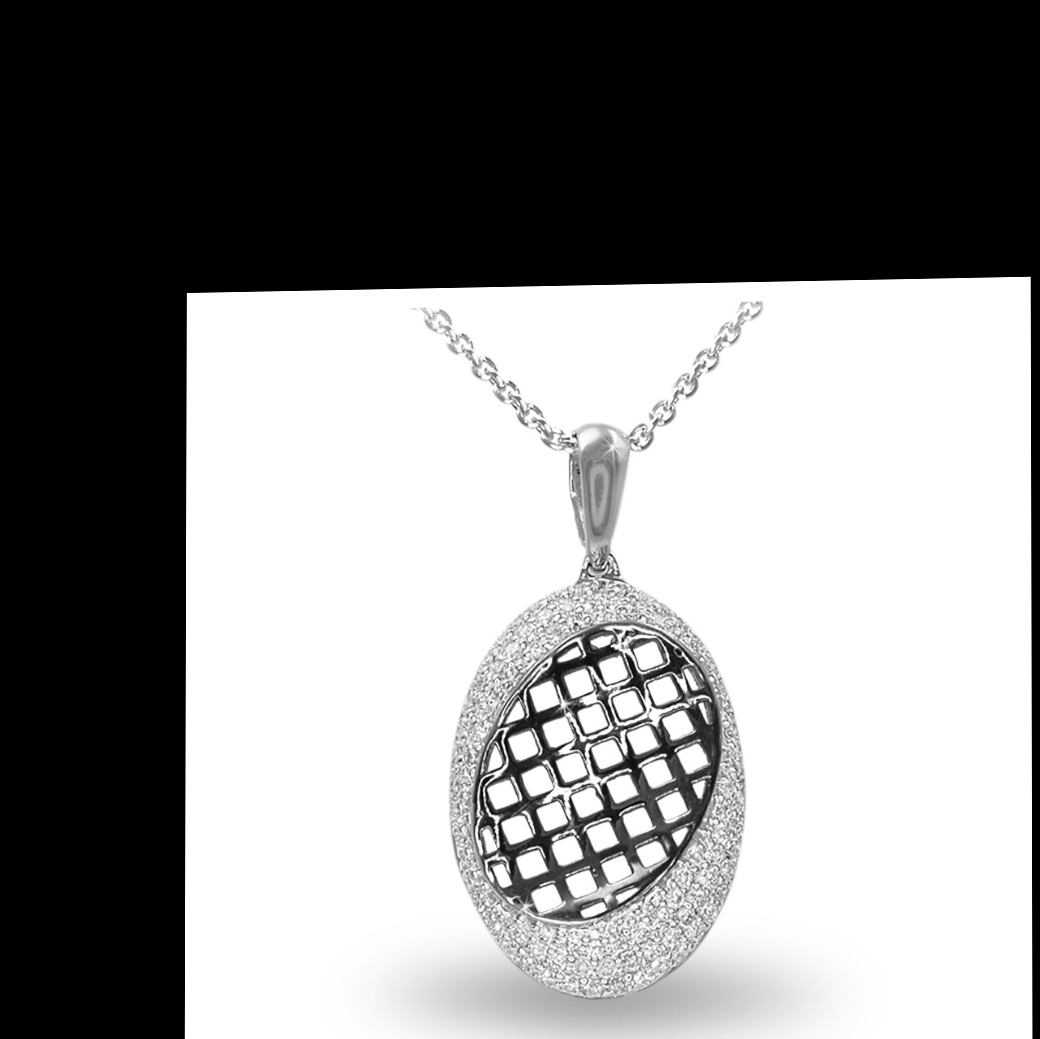

In [17]:
cv2_imshow(warped_image)

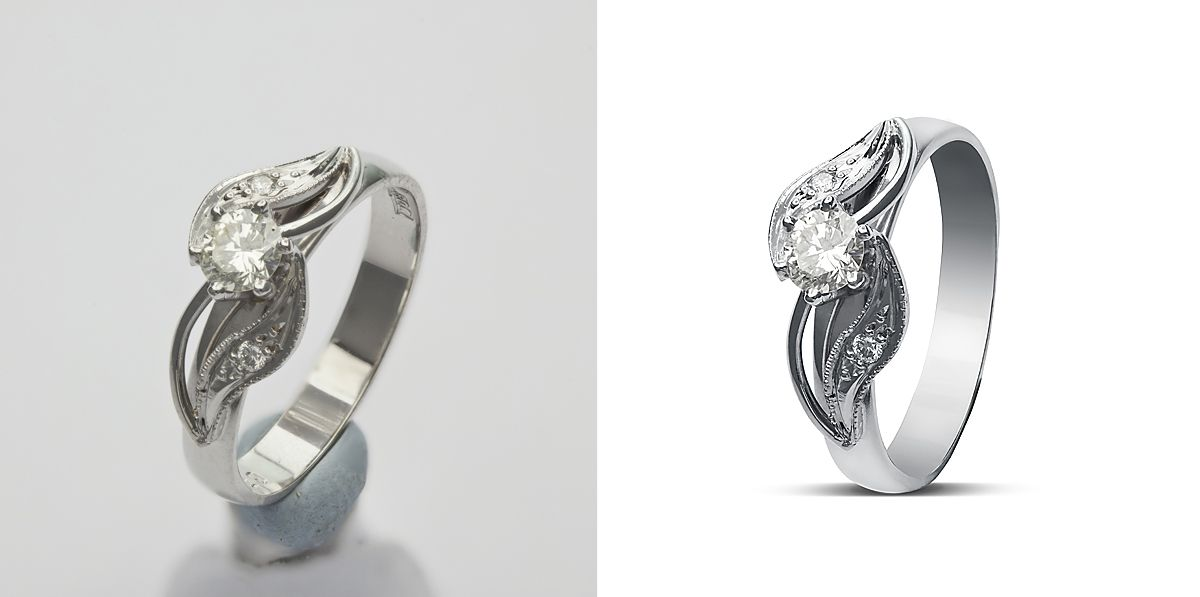

In [18]:
!wget https://i.pinimg.com/originals/fb/1d/65/fb1d656ae9aafdc61fa36819871cea8e.jpg -q -O ../data/images/good_before_after1.jpg
im = cv2.imread("../data/images/good_before_after1.jpg")
cv2_imshow(im)

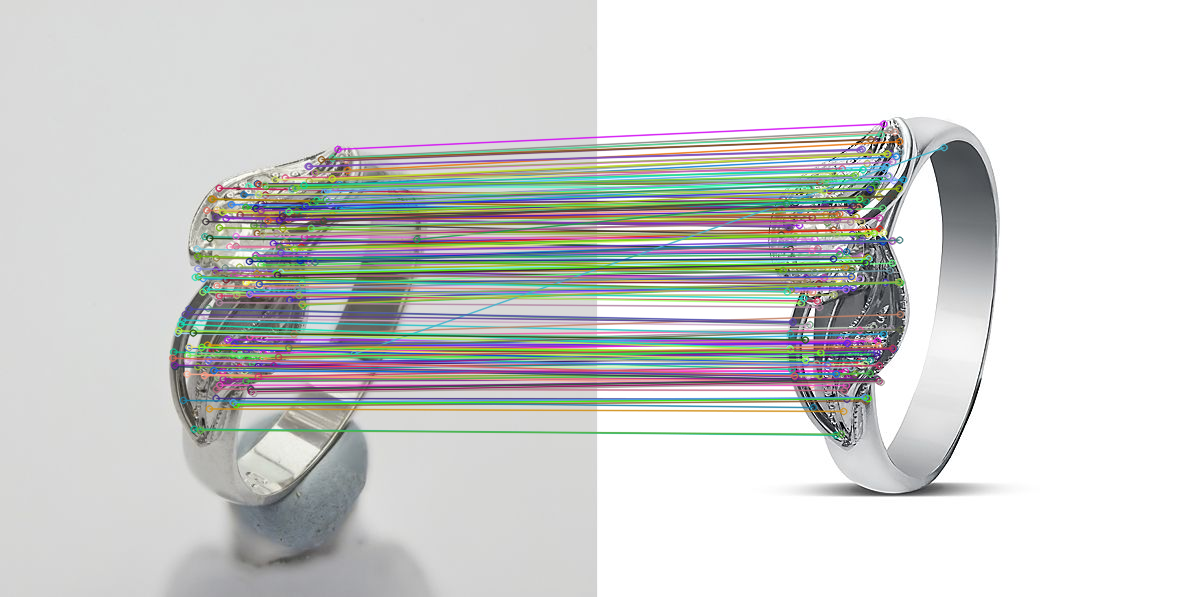

In [19]:
# split image
before, after = split_image_horizontally("../data/images/good_before_after1.jpg")
warped_image, img3, good_matches, matches = match_by_keypoints(before, after)
cv2_imshow(img3)

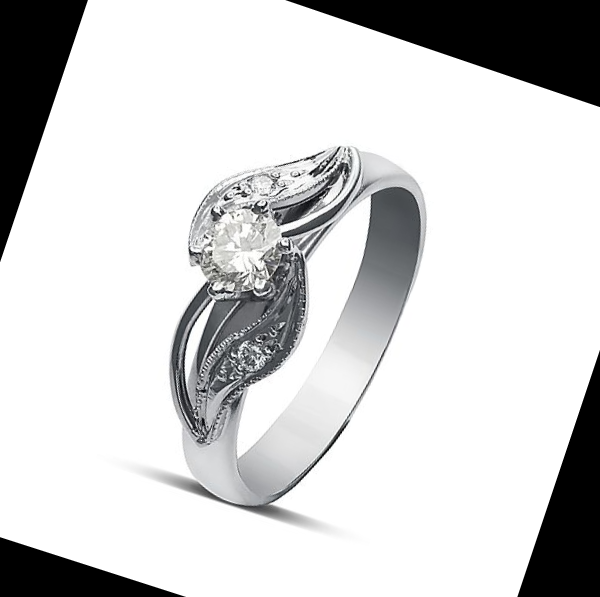

In [20]:
cv2_imshow(warped_image)

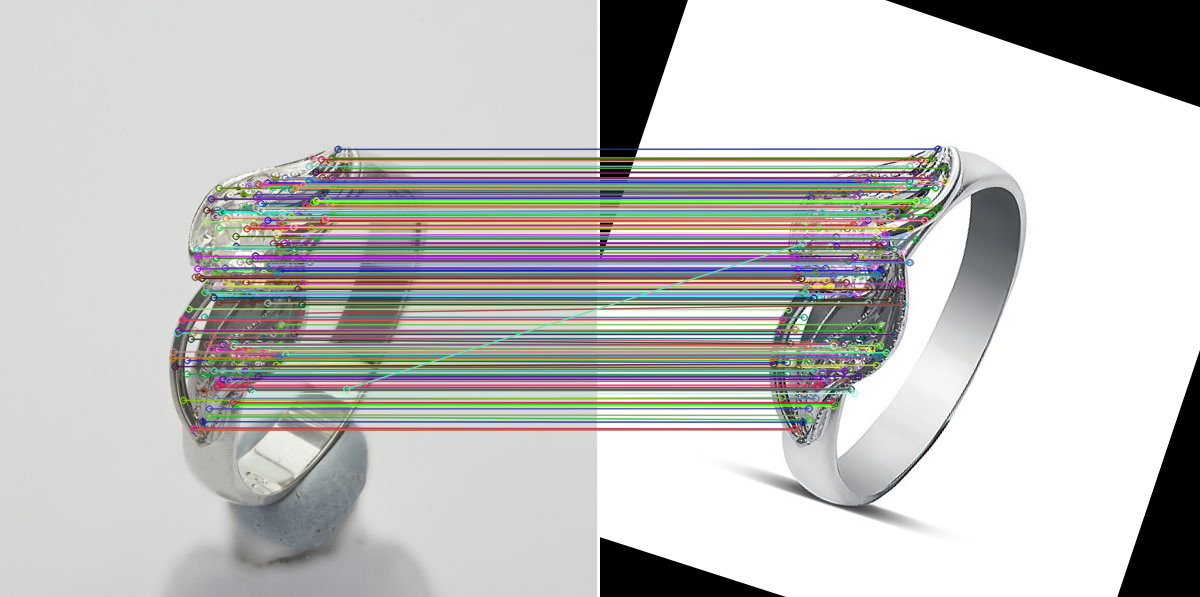

In [21]:
before, after = split_image_horizontally("../data/images/good_before_after1.jpg")
warped_image, img3, good_matches, matches = match_by_keypoints(before, warped_image)
cv2_imshow(img3)

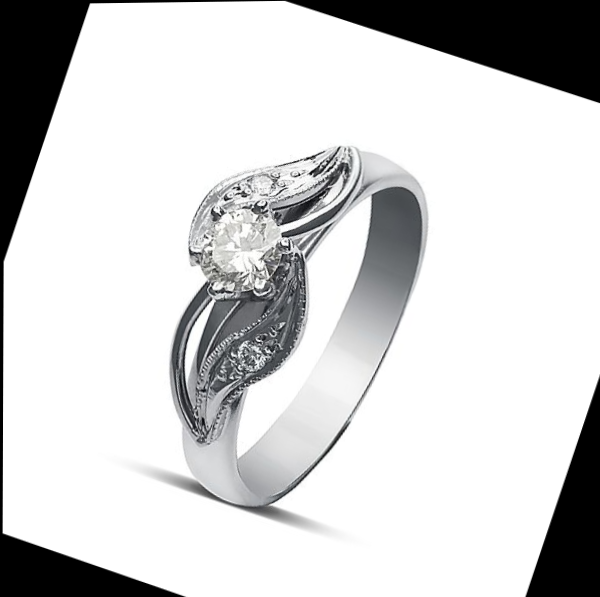

In [22]:
cv2_imshow(warped_image)

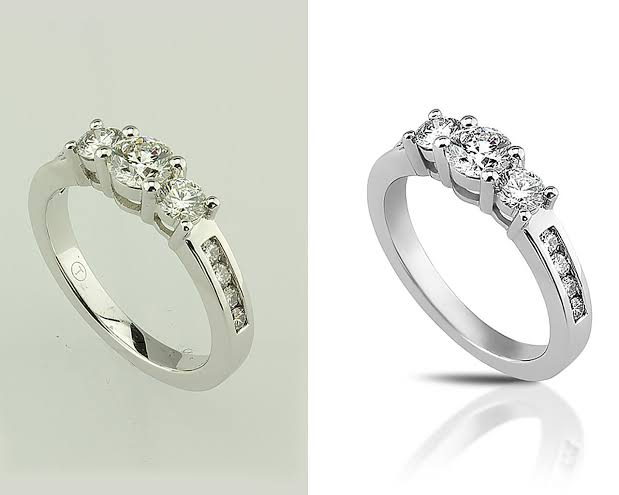

In [52]:
!wget https://www.infotecsourz.com/wp-content/uploads/2019/07/Product-photo-editing.jpeg -q -O ../data/images/good_before_after3.jpg
im = cv2.imread("../data/images/good_before_after3.jpg")
cv2_imshow(im)

In [53]:
before, after = split_image_horizontally("../data/images/good_before_after3.jpg")
warped_image, img3, good_matches, matches = match_by_keypoints(before, warped_image)
cv2_imshow(img3)

error: OpenCV(4.4.0) /tmp/pip-req-build-cg56sov1/opencv/modules/calib3d/src/fundam.cpp:372: error: (-5:Bad argument) The input arrays should be 2D or 3D point sets in function 'findHomography'


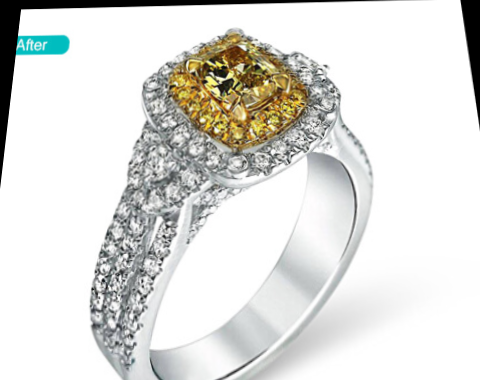

In [51]:
cv2_imshow(warped_image)